# Rice-Leaf Disease Prediction - Computer vision

## Introduction

I started my Data Science journey through datamites doing a 6 month certification course in Data Science. After my first two projects in classification and regression, I took up the challenge in neural network. The project is done as Proof of Concept during my internship in Rubixe.

The dataset used is a set of pictures of disease affecting the rice leaves. The study collects various pictures of rice leasves that has been affected and classified them into 3 categories.

## Problem Description

The goal is to identify the disease that has affected the rice crop by analysing the given picture of the leaf.

## Dataset

There are 119 image files belonging to three classes in the dataset. 

## Plan of Action

* Firstly, the images have to be resized and standardized. 

* Then a Convolution model has to be build with suitable layers and appropriate filters which will give a good learning curve.

The model built was hypertuned to maximise its performance.

The final model gave an accuracy of 87%.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image,image_dataset_from_directory

#import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pickle


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.utils import to_categorical



In [3]:
print(tf.__version__)

2.5.0


In [4]:

DATADIR = "/Users/thamanna/Project/Rice-Leaf/Rice_Leaf_Disease"
class_names = ["Bacterial leaf blight", "Brown spot","Leaf smut"]
os.listdir(DATADIR)

['.DS_Store', 'Bacterial leaf blight', 'Leaf smut', 'Brown spot']

In [5]:
my_directory=image_dataset_from_directory(DATADIR,
                            labels='inferred',
                            label_mode='int',
                            class_names=class_names,
                            color_mode='rgb',
                            image_size=(200,200),
                            shuffle = True ,
                            seed = 100,
                            smart_resize=True
                            )

Found 119 files belonging to 3 classes.


## Display the images

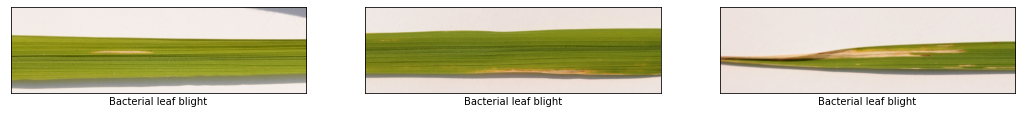

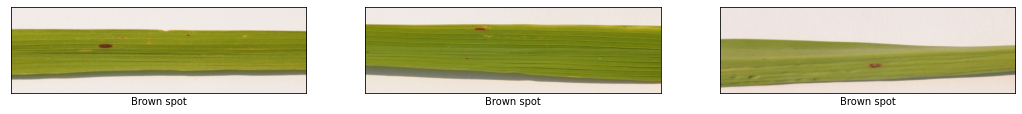

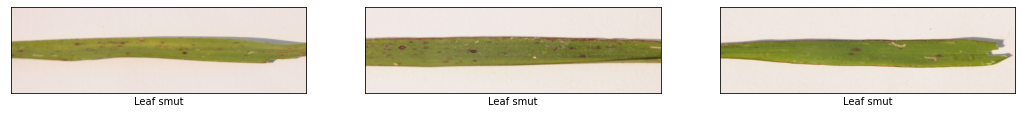

In [6]:
# lets explore 3 files from each classes in the dataset

for names in class_names:
    path = os.path.join(DATADIR,names)
    img = list(os.listdir(path))
    plt.figure(figsize=(18,18))
    for i in range(3):
        filename = os.path.join(path,img[i])
        imag = image.load_img(filename)
        img_array = image.img_to_array(imag)
        plt.subplot(3,3,i+1)
        plt.xlabel(names)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img_array/255)

plt.show()
        



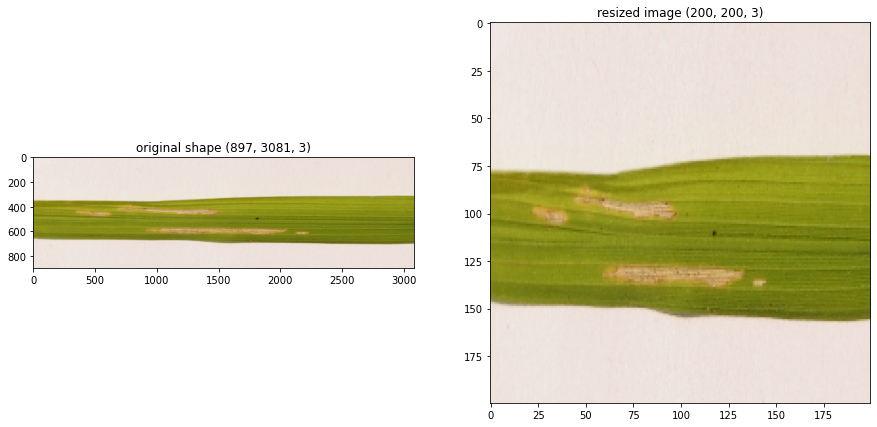

In [7]:
# plotting one of the random resized image alongside the original

im_sample=image.img_to_array(image.load_img(my_directory.file_paths[20]))
resized_image = tf.image.resize(im_sample, [200, 200])

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im_sample/255)
plt.title('original shape {}'.format(im_sample.shape))
plt.subplot(1,2,2)
plt.imshow(resized_image/255)
plt.title('resized image {}'.format(resized_image.shape))
plt.show()

In [8]:
# create a dictionary for the number of images in each folder

number_classes = {'Bacterial_leaf_blight': len(os.listdir(class_names[0])), #(os.path.join(DATADIR, class_names[0]))),
                  'Brown_spot': len(os.listdir(class_names[1])), #(os.path.join(DATADIR,class_names[1]))),
                 'Leaf_smut': len(os.listdir(class_names[0]))} #(os.path.join(DATADIR,class_names[2])))} 


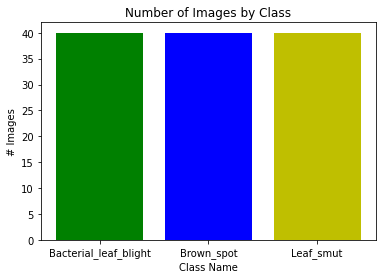

In [9]:
plt.bar(number_classes.keys(), number_classes.values(),color=['g','b','y'])
plt.title("Number of Images by Class")
plt.xlabel('Class Name')
plt.ylabel('# Images')
plt.show()

## Preprocessing the data

In [10]:
# create a list with the images as well as their labels and also scale and resize the images
# the images are resized to 200x200 pixel size

X=np.array([])
y=np.array([])

for features,labels in my_directory.as_numpy_iterator():
    X=np.append(X,features)
    y=np.append(y,labels)

X=X.reshape(-1,200,200,3)

y = to_categorical(y)

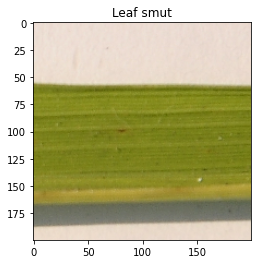

In [11]:
# displaying a random resized image 
plt.imshow(X[84]/255)
plt.title(class_names[np.argmax(y[44])])
plt.show()

In [12]:
# Store the data set so that it can be retrieved at any time


pickle_out = open("X.pickle", "wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

to read the data later use <br>
pickle_in = open("X.pickle","rb") <br>
X = pickle.load(pickle_in)

### Split the data into training and validation sets

In [71]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [72]:
#Scaling the features
X=X/255

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [74]:
y_train.shape,y_test.shape

((95, 3), (24, 3))

In [75]:
x_train.shape, x_test.shape

((95, 200, 200, 3), (24, 200, 200, 3))

## Initialize a model and add layers

A sequential model is initialised with 3 hidden layers

In [81]:
#Initialize the model
model =Sequential()

# the shape of the data is (300,300,3) but use X.shape[1:] to get this value dynamically
model.add(Conv2D(32,kernel_size=(3, 3),input_shape=(200,200,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  #pool_size the window size over which to take the maximum,

model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [82]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 33856)            

## Compile the model

The model is compiled using the metric as accuracy and hence we check for maximum accuracy.

A CustomCallBack class is declared to instantiate early stopping of the compilation and prevent overfitting of the model.


In [83]:
class CustomCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        if logs.get('val_accuracy')>=0.80:
            self.model.stop_training = True

stop_early = CustomCallBack()

In [84]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer ='adam',
              metrics =['accuracy'])

history = model.fit(x_train,y_train,steps_per_epoch=4, epochs=50,validation_data=(x_test,y_test),callbacks=[stop_early])


Epoch 1/50
4/4 [==============================] - 4s 979ms/step - loss: 1.8500 - accuracy: 0.3368 - val_loss: 1.1035 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 4s 960ms/step - loss: 1.1085 - accuracy: 0.2737 - val_loss: 1.0916 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 4s 911ms/step - loss: 1.0792 - accuracy: 0.4105 - val_loss: 1.0561 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 4s 922ms/step - loss: 1.0448 - accuracy: 0.4842 - val_loss: 1.0023 - val_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 4s 919ms/step - loss: 1.0940 - accuracy: 0.4421 - val_loss: 1.2125 - val_accuracy: 0.4167
Epoch 6/50
4/4 [==============================] - 4s 919ms/step - loss: 1.0919 - accuracy: 0.4842 - val_loss: 0.9834 - val_accuracy: 0.6250
Epoch 7/50
4/4 [==============================] - 4s 923ms/step - loss: 0.9850 - accuracy: 0.5158 - val_loss: 0.9452 - val_accuracy: 0.5833
Epoch 8/50
4/4 [====

## Evaluate and Plot Learning Curve

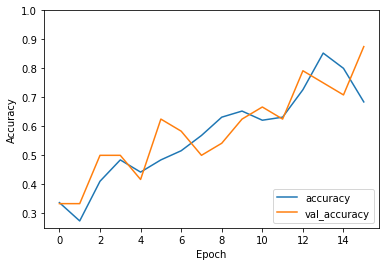

In [85]:
# Evaluate the model

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.25,1])
plt.legend(loc='lower right')

In [86]:
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=2)


1/1 - 0s - loss: 0.4710 - accuracy: 0.8750


In [87]:

predictions = model.predict(x_test)
predictions[1]

array([0.19845498, 0.14683169, 0.65471333], dtype=float32)

In [88]:
predictions.shape , y_test.shape

((24, 3), (24, 3))

In [89]:

np.argmax(predictions[20]),np.argmax(y_test[20])

(0, 0)

In [90]:

y_predict = np.argmax(predictions,axis=1)
y_true = np.argmax(y_test,axis=1)
print(classification_report(y_true,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.88      0.78      0.82         9
           2       0.80      1.00      0.89         8

    accuracy                           0.88        24
   macro avg       0.89      0.88      0.88        24
weighted avg       0.89      0.88      0.87        24



# Hyperparameter tuning with the Keras tuner

In [91]:
#!pip install -q -U keras-tuner

In [92]:

import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, Hyperband

In [93]:
# Load the data from the pickle

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape

(95, 200, 200, 3)

In [99]:
# Create a hyper model

def create_model(hp):
    model = Sequential()
    conv_1 = hp.Int('conv_1',min_value=32, max_value=512, step=32)
    conv_2 = hp.Int('conv_2',min_value=32, max_value=512, step=32)
    conv_3 = hp.Int('conv_3',min_value=32, max_value=512, step=32)
    
    model.add(Conv2D(filters=conv_1,kernel_size=3,activation='relu',input_shape =(200,200,3)))
    model.add(Conv2D(filters=conv_2,kernel_size=3,activation='relu'))
    model.add(Conv2D(filters=conv_3,kernel_size=3,activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(3,activation='softmax'))
    l_r = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=l_r),
                  loss=tf.keras.losses.categorical_crossentropy,
                  metrics=['accuracy'])
    return model

In [100]:
# Instantiate the tuner

tuner=RandomSearch(create_model,objective='val_accuracy',max_trials=5,seed = 1,directory='output',project_name="Rice_Leaf_ktrs2")


INFO:tensorflow:Reloading Oracle from existing project output/Rice_Leaf_ktrs2/oracle.json
INFO:tensorflow:Reloading Tuner from output/Rice_Leaf_ktrs2/tuner0.json


In [101]:
# Create callback to stop training early
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='min',restore_best_weights=True)

In [102]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test),callbacks = [early_stop])

Trial 4 Complete [00h 03m 23s]
val_accuracy: 0.5416666865348816

Best val_accuracy So Far: 0.5416666865348816
Total elapsed time: 00h 11m 17s
INFO:tensorflow:Oracle triggered exit


In [103]:
tuner.results_summary()

Results summary
Results in output/Rice_Leaf_ktrs2
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1: 96
conv_2: 64
conv_3: 96
learning_rate: 0.0001
Score: 0.5416666865348816
Trial summary
Hyperparameters:
conv_1: 64
conv_2: 96
conv_3: 64
learning_rate: 0.001
Score: 0.4583333432674408
Trial summary
Hyperparameters:
conv_1: 64
conv_2: 32
conv_3: 128
learning_rate: 0.001
Score: 0.4166666567325592
Trial summary
Hyperparameters:
conv_1: 96
conv_2: 96
conv_3: 64
learning_rate: 0.01
Score: 0.3333333432674408
Trial summary
Hyperparameters:
conv_1: 32
conv_2: 128
conv_3: 64
learning_rate: 0.01
Score: 0.3333333432674408


In [104]:
best_model=tuner.get_best_models(num_models=1)[0]

In [105]:
loss_rs, accuracy_rs = best_model.evaluate(x_test,y_test)

1/1 [==============================] - 3s 3s/step - loss: 121.3559 - accuracy: 0.5417


In [106]:
tuner=Hyperband(create_model,objective='val_accuracy',max_epochs=5,seed = 1,directory='output',project_name="hyperband_flow2")

In [108]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test),callbacks = [early_stop])

Trial 10 Complete [00h 18m 56s]
val_accuracy: 0.375

Best val_accuracy So Far: 0.625
Total elapsed time: 03h 23m 38s
INFO:tensorflow:Oracle triggered exit


In [109]:
tuner.results_summary()

Results summary
Results in output/hyperband_flow2
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1: 96
conv_2: 480
conv_3: 480
learning_rate: 0.0001
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.625
Trial summary
Hyperparameters:
conv_1: 288
conv_2: 128
conv_3: 352
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.4166666567325592
Trial summary
Hyperparameters:
conv_1: 96
conv_2: 480
conv_3: 160
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.375
Trial summary
Hyperparameters:
conv_1: 160
conv_2: 96
conv_3: 480
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.375
Trial summary
Hyperparameters:
conv_1: 288
conv_2: 128
conv_3: 352
learning_rate: 0.0001
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 949b

In [110]:
best_model1=tuner.get_best_models(num_models=1)[0]

In [113]:
loss_hp, accuracy_hp = best_model1.evaluate(x_test,y_test)

1/1 [==============================] - 39s 39s/step - loss: 1.6708 - accuracy: 0.6250


In [114]:
result=pd.DataFrame([[test_loss,test_acc],[loss_rs,accuracy_rs],[loss_hp,accuracy_hp]],columns=['Loss','Accuracy'],index=['Base Model','RandomSearch hp','HyperBand hp'])
result

,Loss,Accuracy
Base Model,0.471025,0.875000
RandomSearch hp,121.355919,0.541667
HyperBand hp,1.670775,0.625000


In [119]:
best_hp=tuner.get_best_hyperparameters()
tuner.search_space_summary()

Search space summary
Default search space size: 4
conv_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
conv_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
conv_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
